### Import packages

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from dateutil.relativedelta import relativedelta



In [2]:
%matplotlib inline

### Load data

In [3]:
df_order = pd.read_csv('data/machine_learning_challenge_order_data.csv')
df_label = pd.read_csv('data/machine_learning_challenge_labeled_data.csv')

In [4]:
df_order.customer_id.value_counts()

15edce943edd    386
8745a335e9cf    288
d956116d863d    286
0063666607bb    273
ae60dce05485    270
               ... 
17faafd27bdc      1
a7a02633e36f      1
19d4686ccc6b      1
33151b171a52      1
26c09bfe49a3      1
Name: customer_id, Length: 245455, dtype: int64

In [5]:
df_label.customer_id.value_counts()

75e16a5e9b35    1
2a35d8fd1786    1
9ff4a793db67    1
f35fe04a5348    1
379ee3dfbfef    1
               ..
8f39336de920    1
84274ff96b34    1
26088d290482    1
5672973b6c07    1
26c09bfe49a3    1
Name: customer_id, Length: 245455, dtype: int64

In [6]:
# percentage of labeled customers in all orders
cus_order = set(df_order.customer_id.unique().tolist())
cus_label = set(df_label.customer_id.unique().tolist())
perc_labeled = len(cus_order.intersection(cus_label)) / len(cus_order.union(cus_label)) * 100
perc_labeled

100.0

In [155]:
len(cus_order)

245455

### Explore

In [7]:
df_order.head()

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356


In [8]:
df_order.dtypes

customer_id             object
order_date              object
order_hour               int64
customer_order_rank    float64
is_failed                int64
voucher_amount         float64
delivery_fee           float64
amount_paid            float64
restaurant_id            int64
city_id                  int64
payment_id               int64
platform_id              int64
transmission_id          int64
dtype: object

In [9]:
for c in df_order.columns:
    if '_id' in c:
        df_order[c] = df_order[c].apply(str)

In [10]:
df_order.describe(include='all')

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
count,786600,786600,786600.000000,761833.000000,786600.000000,786600.000000,786600.00000,786600.000000,786600,786600,786600,786600,786600
unique,245455,776,NaN,NaN,NaN,NaN,NaN,NaN,13569,3749,5,14,10
top,15edce943edd,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,37623498,10346,1619,29463,4356
freq,386,4230,NaN,NaN,NaN,NaN,NaN,NaN,1317,86654,476600,241523,341734
mean,NaN,NaN,17.588796,9.436810,0.031486,0.091489,0.18118,10.183271,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.357192,17.772322,0.174628,0.479558,0.36971,5.618121,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,16.000000,1.000000,0.000000,0.000000,0.00000,6.648120,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,18.000000,3.000000,0.000000,0.000000,0.00000,9.027000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,20.000000,10.000000,0.000000,0.000000,0.00000,12.213000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

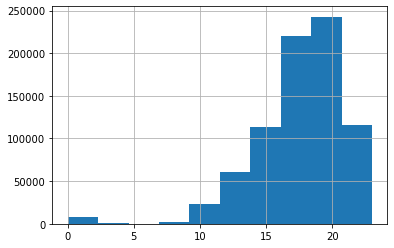

In [11]:
df_order.order_hour.hist()

<AxesSubplot:ylabel='Frequency'>

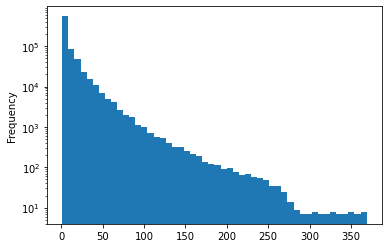

In [12]:
df_order.customer_order_rank.plot(kind='hist', bins=50, logy=True)
# check if frequency is strongly correlated to returning

In [65]:
res_prop = df_order.groupby('restaurant_id').agg({'amount_paid':['median', 'count']})
res_prop.columns = ['_'.join(col) for col in res_prop.columns.values]
res_prop

,amount_paid_median,amount_paid_count
restaurant_id,,
100053498,13.00950,7
100063498,8.38980,163
100073498,13.06260,170
100103498,7.38090,205
100163498,13.14225,34
...,...,...
99773498,15.77070,5
99803498,15.94593,3
99833498,9.71730,181


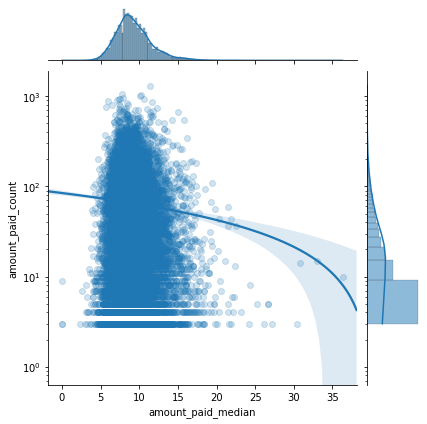

In [68]:
g = sns.jointplot(x="amount_paid_median", y="amount_paid_count", data=res_prop[res_prop.amount_paid_count>=3],
                  kind="reg", truncate=False,
                  joint_kws = {'scatter_kws':dict(alpha=0.2)})
g.ax_joint.set_yscale('log')

In [ ]:
res_prop[res_prop.am]

In [13]:
# sns.pairplot(df_order[['order_hour', 'customer_order_rank', 'is_failed', 'voucher_amount', 
#                        'delivery_fee', 'amount_paid']].sample(frac=0.1, random_state=12), 
#              plot_kws={'alpha':0.1})

<AxesSubplot:title={'center':'Order trend'}, xlabel='order_date'>

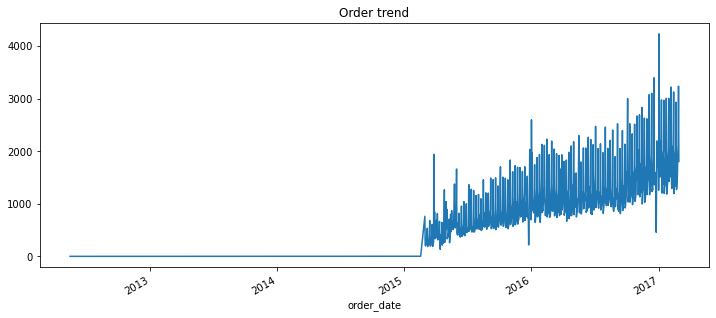

In [20]:
dfs = df_order.groupby('order_date')['customer_id'].count()
dfs.index = pd.to_datetime(dfs.index)
dfs.plot(title='Order trend', figsize=(12,5))

In [25]:
dfs[dfs > 1].sort_index().head(10)

order_date
2013-10-31      2
2014-05-11      2
2014-12-28      2
2015-02-06      3
2015-02-17      3
2015-03-01    762
2015-03-02    221
2015-03-03    199
2015-03-04    228
2015-03-05    228
Name: customer_id, dtype: int64

It seems like we can safetly remove the minor transactions before 2015-03-01 and keep the rest of transactions.

In [30]:
df_order = df_order[df_order.order_date >= '2015-03-01'].reset_index(drop=True)
df_order.shape

(786547, 13)

Now we look at the `df_label` dataframe.

In [41]:
df_label.head()

,customer_id,is_returning_customer
0,000097eabfd9,0
1,0000e2c6d9be,0
2,000133bb597f,1
3,00018269939b,0
4,0001a00468a6,0


In [42]:
df_label.is_returning_customer.value_counts()

0    189948
1     55507
Name: is_returning_customer, dtype: int64

### Feature Engineering

Derivation of the following features can be done

- Transaction patterns (FRM): frequency (amount of orders completed per month in the last 12 months, per week in the last 12 weeks), recency (number of days since last order, latest customer_order_rank), monetary (median and total of voucher_amount/delivery_fee/amount_paid in the past)
- Transaction behaviors (weekday preference in terms of %)
- Restaurant orientations (variety of ordered restaurants)

In [93]:
df_order.order_date.min(), df_order.order_date.max()

('2015-03-01', '2017-02-27')

In [134]:
df_order.is_failed.value_counts()

0    761786
1     24761
Name: is_failed, dtype: int64

In [152]:
months = sorted(df_order.year_month.unique().tolist())

In [130]:
i = len(months) - 1
cur = months[i]
start = months[i-3]
df = df_order[df_order.order_date > start].reset_index(drop=True)

#### 1. Transaction patterns

In [121]:
df['year_month'] = df.order_date.apply(lambda x: x[0:7])
df['week_in_month'] = df.order_date.apply(lambda x: 
    'W1' if x[8:10] <= '07' 
    else('W2' if x[8:10] <= '14' 
    else ('W3' if x[8:10] <= '21' 
    else 'W4')))
df['year_month_week'] = df['year_month'] + '_' + df['week_in_month']
df['weekday'] = pd.to_datetime(df.order_date).apply(lambda x: calendar.day_name[x.weekday()])

Since most of the months have more than 28 days, it is expected to see Week 4 (W4) to have more transactions.

In [122]:
df['year_month'].value_counts().sort_index(), df.week_in_month.value_counts(), df.weekday.value_counts()

(2016-11    47129
 2016-12    52190
 2017-01    57021
 2017-02    50619
 Name: year_month, dtype: int64, W4    59200
 W1    51585
 W2    48292
 W3    47882
 Name: week_in_month, dtype: int64, Sunday       50366
 Friday       31408
 Saturday     31120
 Thursday     24478
 Tuesday      23638
 Wednesday    23303
 Monday       22646
 Name: weekday, dtype: int64)

It is no surprise that customers tend to order more on Friday, Saturday and especially Sunday.

In [146]:
df['is_succeeded'] = df.is_failed.apply(lambda x: 1-x)
df_freq_m = df.groupby(['customer_id', 'year_month'])['is_succeeded']\
    .agg('sum').reset_index()
df_freq_m

,customer_id,year_month,is_succeeded
0,000133bb597f,2017-02,1
1,00018269939b,2017-02,1
2,0001d9036b5e,2017-01,2
3,0001e1e04d7d,2017-01,1
4,000235bf6618,2016-11,1
...,...,...,...
127748,fff976637d35,2016-12,1
127749,fffa8c5b83b4,2017-01,1
127750,fffcde162d10,2016-12,1
127751,fffcf45e5c69,2016-11,1


In [147]:
df_freq_w = df.groupby(['customer_id', 'year_month_week'])['is_succeeded']\
    .agg('sum').reset_index()
df_freq_w

,customer_id,year_month_week,is_succeeded
0,000133bb597f,2017-02_W4,1
1,00018269939b,2017-02_W1,1
2,0001d9036b5e,2017-01_W1,1
3,0001d9036b5e,2017-01_W4,1
4,0001e1e04d7d,2017-01_W2,1
...,...,...,...
171627,fff976637d35,2016-12_W4,1
171628,fffa8c5b83b4,2017-01_W4,1
171629,fffcde162d10,2016-12_W2,1
171630,fffcf45e5c69,2016-11_W3,1


In [137]:
current_date = pd.to_datetime(cur) + relativedelta(months=1)

def last_order_in_days(g):
    r = {}
    x = g[g.is_failed == 0].order_date
    r['last_succeeded_in_days'] = (current_date - pd.to_datetime(x.max())).days if len(x) > 0 else -1
    x = g[g.is_failed == 1].order_date
    r['last_failed_in_days'] = (current_date - pd.to_datetime(x.max())).days if len(x) > 0 else -1
    return pd.Series(r, index=['last_succeeded_in_days', 'last_failed_in_days'])

df_rcc = df.groupby('customer_id')[['is_failed', 'order_date']].apply(last_order_in_days)
df_rcc = df_rcc.reset_index()
df_rcc

,last_succeeded_in_days,last_failed_in_days
customer_id,,
000133bb597f,3,-1
00018269939b,24,-1
0001d9036b5e,32,-1
0001e1e04d7d,50,-1
000235bf6618,101,-1
...,...,...
fff88124accd,17,-1
fff976637d35,67,-1
fffa8c5b83b4,33,-1


In [143]:
df_money = df.groupby('customer_id')[['voucher_amount', 'delivery_fee', 'amount_paid']]\
    .agg(['sum','median']).reset_index()
df_money.columns = ['_'.join(col) for col in df_money.columns.values]
df_money

,customer_id_,voucher_amount_sum,voucher_amount_median,delivery_fee_sum,delivery_fee_median,amount_paid_sum,amount_paid_median
0,000133bb597f,0.0,0.0,0.493,0.493,5.93658,5.93658
1,00018269939b,0.0,0.0,0.493,0.493,9.82350,9.82350
2,0001d9036b5e,0.0,0.0,0.000,0.000,20.86830,10.43415
3,0001e1e04d7d,0.0,0.0,0.000,0.000,18.05400,18.05400
4,000235bf6618,0.0,0.0,0.000,0.000,6.31890,6.31890
...,...,...,...,...,...,...,...
85996,fff88124accd,0.0,0.0,0.000,0.000,15.34590,7.67295
85997,fff976637d35,0.0,0.0,1.479,1.479,15.13350,15.13350
85998,fffa8c5b83b4,0.0,0.0,0.000,0.000,6.28173,6.28173
85999,fffcde162d10,0.0,0.0,0.000,0.000,5.04450,5.04450


In [149]:
# royalty, total failed transactions
df_misc = df.groupby('customer_id').agg({
    'customer_order_rank': 'max',
    'is_failed': 'sum',
})
df_misc.rename(columns={'is_failed':'is_failed_sum'}, inplace=True)
df_misc

,customer_order_rank,is_failed_sum
customer_id,,
000133bb597f,1.0,0
00018269939b,1.0,0
0001d9036b5e,3.0,0
0001e1e04d7d,6.0,0
000235bf6618,1.0,0
...,...,...
fff88124accd,11.0,0
fff976637d35,1.0,0
fffa8c5b83b4,1.0,0


#### 2. Transaction behaviors (weekday preference in terms of %)

In [174]:
def weekday_dist(g):
#     g = df[df.customer_id=='001ae9f68533']
    x = g.weekday.value_counts() / len(g) * 100
    x.to_dict()
    return 0

df_weekday = df.groupby(['customer_id'])[['is_failed', 'weekday']].apply(weekday_dist)
# df_weekday.name = 'count'
# df_weekday = df_weekday.reset_index()
df_weekday

customer_id
000133bb597f    0
00018269939b    0
0001d9036b5e    0
0001e1e04d7d    0
000235bf6618    0
               ..
fff88124accd    0
fff976637d35    0
fffa8c5b83b4    0
fffcde162d10    0
fffcf45e5c69    0
Length: 86001, dtype: int64

In [187]:
weekdays = ['Thursday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday', 'Monday', 'unk']

g = df[df.customer_id=='001ae9f68533']
x = g.weekday.value_counts() / len(g) * 100
x = x.to_dict()
for d in weekdays:
    x[d] = x.get(d, 0.0)

{'Thursday': 30.0,
 'Tuesday': 25.0,
 'Friday': 10.0,
 'Saturday': 10.0,
 'Wednesday': 10.0,
 'Sunday': 10.0,
 'Monday': 5.0,
 'unk': 0.0}

In [184]:
x.keys()

Index(['Thursday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Monday'],
      dtype='object')

#### 3. Restaurant orientations (variety of ordered restaurants)

In [ ]:
df_res = df.groupby(['customer_id', 'year_month_week'])['is_succeeded']\
    .agg('sum').reset_index()
df_freq_w

### Problem Formulation

#### 1. A Simple Model on Feb 2017

We are going to use features derived in one year (2016-03 to 2017-02) to train and predict if a customer comes back within 6 months. The reason for *one year (12 months)* period is that holidays reoccur yearly, so customers might order again if they order last year; that's the longest time factor that can drive reodering.

In [34]:
df_order_sample = df_order[df_order.order_date >= '2016-03-01'].reset_index()
df_order_sample.shape

(507770, 14)

In [70]:
np.median([1])

1.0

In [ ]:
### Problem Design and Train-Test Splitting
df_order.order_date.min(), df_order.order_date.max()